In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf

In [2]:
# Step 1: Load Data
data = pd.read_csv("C:\\Users\\HP\\Downloads\\goog1.csv")

# Display basic EDA
print("Dataset Head:\n", data.head())
print("\nDataset Description:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Head:
          Date        Open        High         Low       Close   Volume
0  12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1  12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2  12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3  12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4  12/23/2016  790.900024  792.739990  787.280029  789.909973   623400

Dataset Description:
              Open        High         Low       Close        Volume
count   61.000000   61.000000   61.000000   61.000000  6.100000e+01
mean   814.005573  817.755576  809.734066  814.561804  1.361269e+06
std     18.784303   18.556004   19.384799   19.265955  4.987376e+05
min    778.809998  782.780029  770.409973  771.820007  6.234000e+05
25%    799.679993  802.700012  793.270020  801.340027  1.057900e+06
50%    809.510010  815.250000  804.539978  809.559998  1.247700e+06
75%    828.659973  833.250000  825.059998  830.630005  1.494

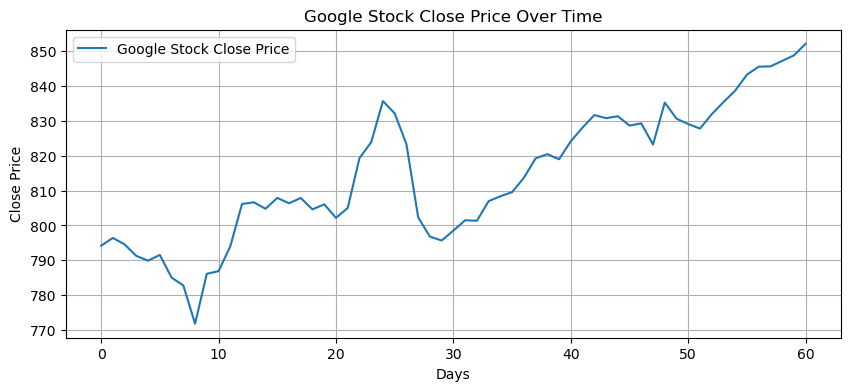

In [3]:
# Plot Close prices over time
plt.figure(figsize=(10, 4))
plt.plot(data['Close'], label='Google Stock Close Price')
plt.title('Google Stock Close Price Over Time')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Step 2: Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [5]:
# Step 3: Split Data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
# Step 4: Create Sequences
def create_sequences(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [7]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [8]:
# Reshape input for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Step 5: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2288
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0419
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0219
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0211
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0279
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0252
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0222
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0259
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0222
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 
Epoch 16/50
11/1

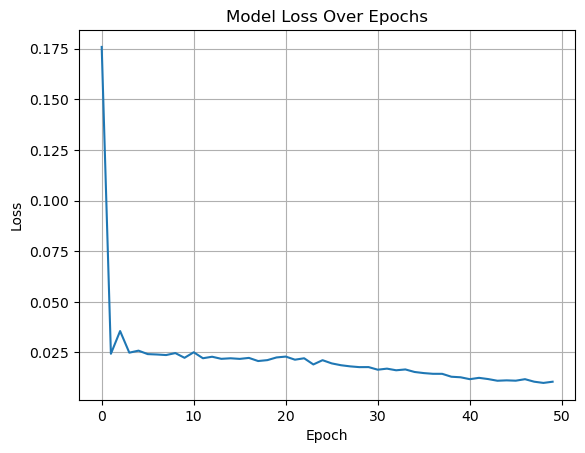

In [12]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [13]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


In [14]:
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)

print(f'\nMAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 14.59
MSE: 217.97
RMSE: 14.76


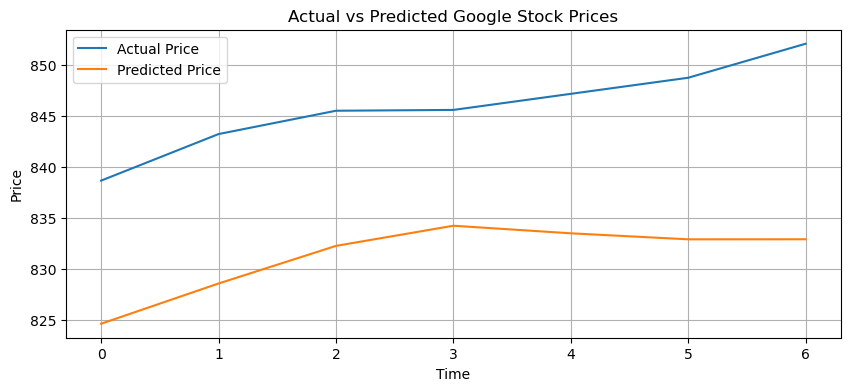

In [15]:
# Step 8: Visualize Actual vs Predicted
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Google Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Step 9: Predict Next Day Price
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
X_pred = np.array([last_6_days_scaled])
X_pred = X_pred.reshape((1, 6, 1))

next_day_pred = model.predict(X_pred)
predicted_price = scaler.inverse_transform(next_day_pred)

print(f"\nPredicted price for the next day: {predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

Predicted price for the next day: 834.52


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf

# Step 1: Load Data
data = pd.read_csv("C:\\Users\\HP\\Downloads\\goog1.csv")

# Display basic EDA
print("Dataset Head:\n", data.head())
print("\nDataset Description:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())

# Plot Close prices over time
plt.figure(figsize=(10, 4))
plt.plot(data['Close'], label='Google Stock Close Price')
plt.title('Google Stock Close Price Over Time')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Step 3: Split Data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Step 4: Create Sequences
def create_sequences(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape input for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 5: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Summary
model.summary()

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)

print(f'\nMAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Step 8: Visualize Actual vs Predicted
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Google Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Step 9: Predict Next Day Price
# last_6_days = data['Close'][-6:].values
# last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
# X_pred = np.array([last_6_days_scaled])
# X_pred = X_pred.reshape((1, 6, 1))

# next_day_pred = model.predict(X_pred)
# predicted_price = scaler.inverse_transform(next_day_pred)

# print(f"\nPredicted price for the next day: {predicted_price[0][0]:.2f}")